
# Project 2: Investigate a Dataset (TMDB Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For investigate a dataset project I will analyze data about “TMDB movie”. I will be mainly focusing the relationship between components. To do this analysis, I will be looking closely at their relationship between revenues, popularity, genres and released year. 

>Here is the lists of my questions for this data set project:
>1. What is most frequent genres?
>2. Is higher popularity make higher in revenues?
>3. How many genres were released each year?


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [13]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [11]:
# There are total of (row, column)
df.shape

(10866, 9)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
genres                  10866 non-null object
production_companies    10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 764.1+ KB


In [13]:
# Checking each data type
df.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

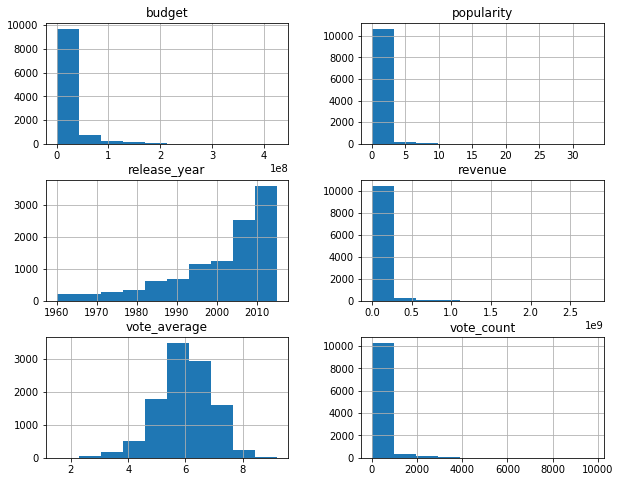

In [14]:
# Histogram shows the distribution pattern
df.hist(figsize=(10,8));


### Data Cleaning (Drop Unneeded Columns)
>Removed: id, imdb_id, cast, homepage, director, tagline, overview, runtime, release_date, revenue_adj, budget_adj

In [4]:
# Used .drop function to dropped unneeded columns
df = pd.read_csv('tmdb-movies.csv')
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'runtime', 'release_date', 'revenue_adj', 'budget_adj','keywords'], axis=1, inplace=True)
df.head()

,popularity,budget,revenue,original_title,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015



### Data Cleaning (Cleaning Duplicates)
>Find and remove duplicate rows

In [22]:
# Find sum of null values in each column
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

In [23]:
sum(df.duplicated())

1

In [24]:
# Drop dupliciated
df.drop_duplicates()
sum(df.duplicated())

1

In [25]:
df.shape

(10866, 9)


### Data Cleaning (Make-up values with Zero)
>To do this Data Cleaning, I will be filling zero values with average. 

In [5]:
# Filling NaN with empty string
df['production_companies'].fillna('', inplace=True)
df['genres'].fillna('', inplace=True)
df.to_csv(r'2.csv', index=True, header=True)

<a id='eda'></a>
## Exploratory Data Analysis

> For this section of the project I will be using compute statistics and create visualizations skills to research questions that I posed in the Introduction section.

### Research Question 1 (What is most frequent genres?)
> For this first research, I will define top 30 genres that are most frequently released of all time. 

{'Action': 2385, 'Adventure': 1471, 'Science Fiction': 1230, 'Thriller': 2908, 'Fantasy': 916, 'Crime': 1355, 'Western': 165, 'Drama': 4761, 'Family': 1231, 'Animation': 699, 'Comedy': 3793, 'Mystery': 810, 'Romance': 1712, 'War': 270, 'History': 334, 'Music': 408, 'Horror': 1637, 'Documentary': 520, 'TV Movie': 167, '': 23, 'Foreign': 188}


Text(0,0.5,'Count of Genres (Frequency)')

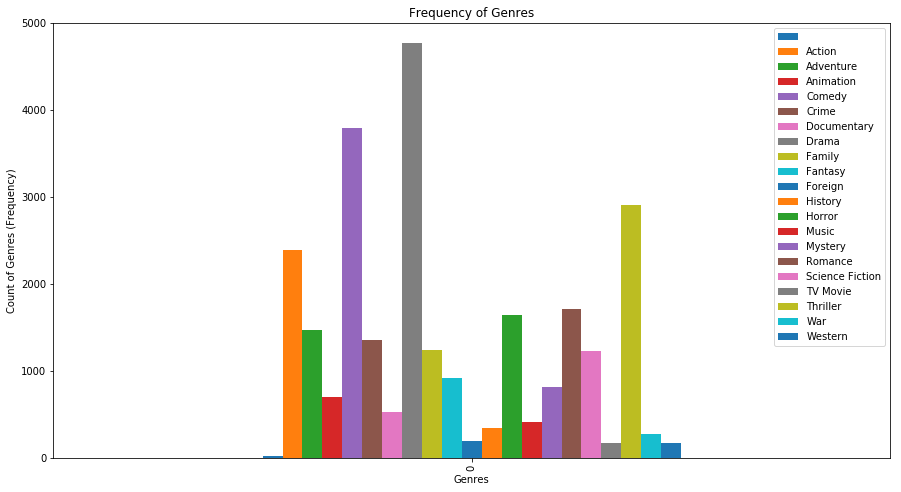

In [6]:
final_data = {} # In order to assemble the data, I made a dictionary
for row in df.genres: # retrive each row from a genre column
    split_data = row.split('|') # by using .split function, split each genres in row and name this 'split_data'
    for item in split_data: # The item refers to 21 genres listed in the data. I used "item" as valuable.
        if item in final_data:# In another words, if 21 genres are in dictionary we add +1 if not it stays at 1. 
            final_data[item] = final_data[item] + 1
        else: 
            final_data[item] = 1
print(final_data) # When final_data is printed, it shows count of each genres
new_df = pd.DataFrame([final_data]) 
new_df.plot(kind='bar',figsize=(15,8),align='center',stacked=False)
plt.title('Frequency of Genres') # Label graph with title and title for Y and X axis
plt.xlabel('Genres')
plt.ylabel('Count of Genres (Frequency)')

<a id='eda'></a>
### Research Question 2 (Is higher popularity make higher in revenues?)
> For this first research, I will define how popularity have relation between revenues. In order to do this comparison, I compared revenue with vote count. I used scatter graph to see the trend of a mass popularity of all time.

Text(0,0.5,'Revnue')

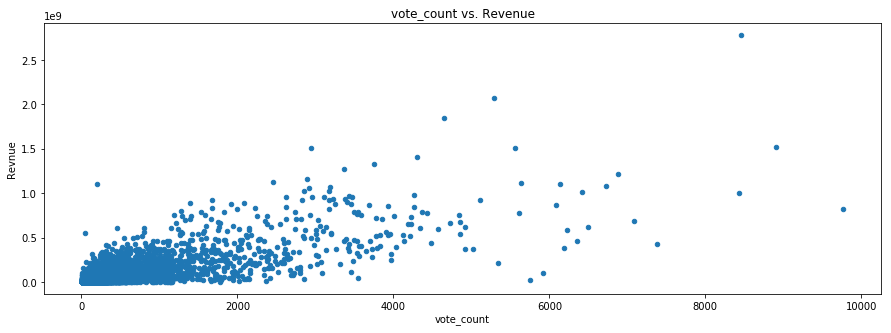

In [26]:
df.plot(x='vote_count', y='revenue', kind='scatter', figsize=(15,5)) # Plot graph by using vote count and revenue
plt.title('vote_count vs. Revenue') # Label title and title for X and Y axis
plt.xlabel('vote_count')
plt.ylabel('Revnue')

### Research Question 3  (How many genres were released each year?)
> For this research, I will define, quantitative of genres that were released over time. 

Text(0,0.5,'Counts')

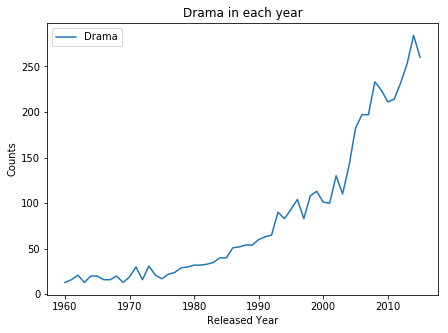

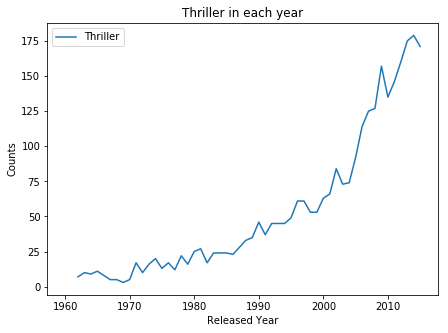

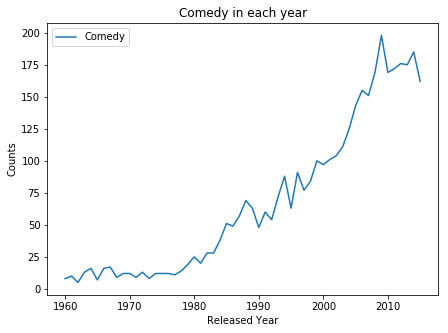

In [10]:
import collections # To use counter function import collections

year = df['release_year'].unique() # To get unique years
year.sort() # To sort the (unique) year in order
new_data = [] # I created a new variable.

for y in year: # Use for in to looping unique release_year
    year_row = df[df['release_year'] == y] # I retrieved release_year column from csv matching to y then put it in to df

    # converting pandas series to column
    genres_ry = list(year_row['genres']) # I retrieved list of genres
    
    genres_sep = [] # this will contain all the genres that we see for a given year(with repetition and "|" separator)
    
    for genre in genres_ry: # for splitting every entry in y_df[genres] with separator as "|" 
        for i in genre.split("|"): # By using .split function, I splited all individual genre and putted it in i loop
            genres_sep.append(i) # By using .append function, I appended I valuable to genres_sep

    genres_counts_each_year = dict(collections.Counter(genres_sep)) # occurrence of each genre in a year by using counter function I counted genres.
    new_data.append(genres_counts_each_year)

result = pd.DataFrame(new_data, index=year)
result.head(200)

# Get graph for individual genres
result.plot(y='Drama', kind='line', figsize=(7,5))
plt.title('Drama in each year')
plt.xlabel('Released Year')
plt.ylabel('Counts')

result.plot(y='Thriller', kind='line', figsize=(7,5),legend=True)
plt.title('Thriller in each year')
plt.xlabel('Released Year')
plt.ylabel('Counts')

result.plot(y='Comedy', kind='line', figsize=(7,5),legend=True)
plt.title('Comedy in each year')
plt.xlabel('Released Year')
plt.ylabel('Counts')




<a id='conclusions'></a>
## Conclusions

> Question 1 conclusion: I researched what are most frequent genres that were released. As a result I figured out Drama, Thriller and Comedy were top three genres that most company produced. Also least produced genres were Western, TV Movie, and Foreign. These most frequent released genres were data from since 1960's.

> Question 2 conclusion: I researched if higher popularity (vote count) make higher in revenue. In order to do this research, I looked relationship between vote count and revenue. I choose vote count to see the popularity among people because people would make a higher vote count if they liked the movie. I demonstrated this visualization by using scatter graph. From the graph I made, I could tell that higher vote count made higher revenue. Although the scatter graph did not gave exact flow like linear graph but still there were trend that were clearly demonstrated on the graph. 

> Question 3 conclusion: I researched what was most produced genres in each year. For this research, I used top 3 genres that was most released of all time. They were Drama, Thriller and Comedy (see Question 1 conclusion). I used line graph to see the trend more easily. Compared to my first research, I researched how individual genre were produced each year to see yearly trend. According to the graph, all three genres were drastically increased since 1980s until 2015. Although Thriller seemed produced higher in rate compared to other two between 1970 and 1980, there weren't noticeable difference.  Over all, they all seem to have similar trend.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0